In [1]:
import os

from scipy.io import arff

from pathlib import Path

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib notebook
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

In [3]:
# import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import TensorDataset

from torch.nn.utils.rnn import pad_sequence
from torch.autograd import Variable

In [45]:
from pathlib import Path
import json
from typing import Dict, List, Optional, Any, Union

In [46]:
import logging
from collections import OrderedDict
from functools import partial

In [47]:
default_dataset_path = Path("D:\\OneDrive - Kaunas University of Technology\\4 Magistrinis\\Project\\Univariate_arff")

In [48]:
meta = pd.read_csv(default_dataset_path / 'TwoClassProblems.csv')

In [49]:
dataset_names = ['Earthquakes', 'Yoga']

In [50]:
dataset_names = list(meta.Problem)

In [51]:
datasets_long = []

In [52]:
# datasets_long = ['HandOutlines', 'HouseTwenty', 'SemgHandGenderCh2']

In [53]:
datasets_good = list(np.setdiff1d(dataset_names,datasets_long))

In [54]:
# def load_data(datasetName):
    
#     target_cols = ['target']
#     dataset_path = default_dataset_path / datasetName
    
#     dfDataset =  pd.DataFrame(columns = ['values', 'target'])
#     dfDataset = pd.DataFrame()
    
#     dataTrain = arff.loadarff(open(dataset_path / f'{dataset}_TRAIN.arff', encoding="UTF-8"))
#     dataTest = arff.loadarff(open(dataset_path / f'{dataset}_TEST.arff', encoding="UTF-8"))
    
#     dfTrain = pd.DataFrame(dataTrain[0])
#     dfTest = pd.DataFrame(dataTest[0])
    
#     train_x, train_y = dfTrain[dfTrain.columns[~dfTrain.columns.isin(target_cols)]], dfTrain[target_cols]
#     test_x ,  test_y = dfTest[dfTest.columns[~dfTest.columns.isin(target_cols)]],   dfTest[target_cols]
    
#     # Time series values
#     data_x = pd.concat([train_x, test_x])
#     data_x = data_x.interpolate()
#     dfDataset['values'] = pd.Series(data_x.values.tolist())
    
#     # Series datatype
#     dfDataset['series'] = dfDataset['values'].map(lambda x: pd.Series(x))
    
#     # Target values
#     data_y = pd.concat([train_y, test_y]).reset_index()
#     scaler = MinMaxScaler()
#     scaledY = scaler.fit_transform(data_y)    
#     data_y['targetInt'] = data_y.target.astype(int)
#     scaledY = pd.DataFrame(scaler.fit_transform(data_y[['targetInt']]), columns = ['scaledTarged'])
#     dfDataset['target'] = scaledY.scaledTarged.astype(int)
    
#     # transform data to tensors
#     tensoredData = pad_sequence([torch.tensor(list(x)) for x in dfDataset['values'].values], batch_first=True)
    
#     # scale data row-wise
#     a = np.array(tensoredData)
#     scaler = StandardScaler()
#     a_scaled = scaler.fit_transform(a.T)
#     a_scaled = a_scaled.T
#     dfScaled = pd.DataFrame(a_scaled)
    
#     dfDataset['scaledValues'] = dfScaled.values.tolist()
#     dfDataset['dataset'] = datasetName
# #     dfDataset['pad'] = paddedData
    
#     return dfDataset[['values', 'scaledValues', 'series', 'target', 'dataset']]

In [55]:
def transform(X, y, setType: str):
    # Transforms the data to format
#     |    | values           |target| setType    |
#     |---:|:-----------------|-----:|:-----------|
#     |  0 | [list of values] |  0/1 | train/test |
#     |  1 | [list of values] |  0/1 | train/test |
#     |  2 | [list of values] |  0/1 | train/test |
#     |  3 | [list of values] |  0/1 | train/test |
#     |  4 | [list of values] |  0/1 | train/test |
    pd.options.mode.chained_assignment = None
    dfTransform = pd.DataFrame()
    scaler = MinMaxScaler()
    
    data_x = X.interpolate()
    dfTransform['values'] = pd.Series(data_x.values.tolist())
    
    
    try:
        y['targetInt'] = y.target.astype(int).copy()
    except:
        y['targetInt'] = y['class'].astype(int).copy()
        
    scaledY = pd.DataFrame(scaler.fit_transform(y[['targetInt']]).astype(int), columns = ['scaledTarget'])
    
    dfTransform['target'] = scaledY['scaledTarget']
    dfTransform['setType'] = setType
    
    return dfTransform
    
    

In [56]:
def load_data(datasetName):
    
    target_cols = ['target']
    dataset_path = default_dataset_path / datasetName
    
    dfDataset = pd.DataFrame()
    
    dfHold = pd.DataFrame()
    
    dataTrain = arff.loadarff(open(dataset_path / f'{dataset}_TRAIN.arff', encoding="UTF-8"))
    dataTest = arff.loadarff(open(dataset_path / f'{dataset}_TEST.arff', encoding="UTF-8"))
    
    dfTrain = pd.DataFrame(dataTrain[0])
    dfTest = pd.DataFrame(dataTest[0])
    
    try:
        train_x, train_y = dfTrain[dfTrain.columns[~dfTrain.columns.isin(target_cols)]], dfTrain[target_cols]
        test_x ,  test_y = dfTest[dfTest.columns[~dfTest.columns.isin(target_cols)]],   dfTest[target_cols]
    except:
        target_cols = ['class']
        train_x, train_y = dfTrain[dfTrain.columns[~dfTrain.columns.isin(target_cols)]], dfTrain[target_cols]
        test_x ,  test_y = dfTest[dfTest.columns[~dfTest.columns.isin(target_cols)]],   dfTest[target_cols]
    
    
    
    
#     dfHold['values'] = train_x.values.tolist()
#     dfHold['set'] = 'train'
    
#     # Time series values
#     data_x = pd.concat([train_x, test_x])
#     data_x = data_x.interpolate()
#     dfDataset['values'] = pd.Series(data_x.values.tolist())
    
#     # Target values
#     data_y = pd.concat([train_y, test_y]).reset_index()
#     scaler = MinMaxScaler()
#     scaledY = scaler.fit_transform(data_y)    
#     data_y['targetInt'] = data_y.target.astype(int)
#     scaledY = pd.DataFrame(scaler.fit_transform(data_y[['targetInt']]), columns = ['scaledTarged'])
#     dfDataset['target'] = scaledY.scaledTarged.astype(int)
    dfDataset = transform(train_x, train_y, 'train')
    dfHold    = transform(test_x, test_y, 'test')
    dfDataset = dfDataset.append(dfHold)
    
    # Series datatype
    dfDataset['series'] = dfDataset['values'].map(lambda x: pd.Series(x))
    
    # transform data to tensors
    tensoredData = pad_sequence([torch.tensor(list(x)) for x in dfDataset['values'].values.copy()], batch_first=True)
    
    # scale data row-wise
    a = np.array(tensoredData).copy()
    scaler = StandardScaler()
    a_scaled = scaler.fit_transform(a.T)
    a_scaled = a_scaled.T
    dfScaled = pd.DataFrame(a_scaled)
    
    dfDataset['scaledValues'] = dfScaled.values.tolist()
    dfDataset['dataset'] = datasetName
#     dfDataset['pad'] = paddedData
    
    return dfDataset[['values', 'scaledValues', 'series', 'target', 'dataset', 'setType']]

In [57]:
# Reads all datasets into one variable
myData = pd.DataFrame()
myTargets = pd.DataFrame()

for dataset in datasets_good:
    loadedData = load_data(dataset)
    myData = pd.concat([myData, loadedData], ignore_index = True)
    print(dataset, "loaded successfully", "\t\t count of series:", len(loadedData.values), 
          "\t series length: ", len(loadedData.scaledValues.iloc[0]))

BeetleFly loaded successfully 		 count of series: 40 	 series length:  512
BirdChicken loaded successfully 		 count of series: 40 	 series length:  512
Chinatown loaded successfully 		 count of series: 363 	 series length:  24
Coffee loaded successfully 		 count of series: 56 	 series length:  286
Computers loaded successfully 		 count of series: 500 	 series length:  720
DistalPhalanxOutlineCorrect loaded successfully 		 count of series: 876 	 series length:  80
DodgerLoopGame loaded successfully 		 count of series: 158 	 series length:  288
DodgerLoopWeekend loaded successfully 		 count of series: 158 	 series length:  288
ECG200 loaded successfully 		 count of series: 200 	 series length:  96
ECGFiveDays loaded successfully 		 count of series: 884 	 series length:  136
Earthquakes loaded successfully 		 count of series: 461 	 series length:  512
FordA loaded successfully 		 count of series: 4921 	 series length:  500
FordB loaded successfully 		 count of series: 4446 	 series length

In [58]:
# If data is of uneven length pad with 0 and transform to tensor
paddedData = pad_sequence([torch.tensor(list(x)) for x in myData['scaledValues'].values], batch_first=True)

# Lengths of vectors
lens = torch.count_nonzero(paddedData, dim=1)

# Mask of unpadded values
paddedMask = pad_sequence([torch.tensor(x*[True]) for x in lens], batch_first=True)

inputLen = paddedData.size(1)

In [59]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
# scaledData = scaler.fit_transform(list(myData.target))

# scaledData = scaler.fit_transform(paddedData)

scaledData = scaler.fit_transform(paddedData.T)
scaledData = scaledData.T

#Tensor for series
train_data = paddedData

# Join tensors
fullDataset = TensorDataset(train_data, paddedMask)

In [60]:
paddedData.size()

torch.Size([47738, 2709])

In [61]:
len(datasets_good)

43

In [62]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32  #32 #1 for RNN
# percentage of training set to use as validation
valid_size = 0.2

# check if GPU is available
train_on_gpu = torch.cuda.is_available()
#train_on_gpu = False
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU.')

Training on GPU!


In [63]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

full_sampler = SubsetRandomSampler(indices)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(fullDataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(fullDataset, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

full_loader = torch.utils.data.DataLoader(fullDataset, batch_size=batch_size, 
    sampler=full_sampler, num_workers=num_workers)

trainMask_loader = torch.utils.data.DataLoader(paddedMask, batch_size=batch_size, 
    sampler=train_sampler, num_workers=num_workers)
validMask_loader = torch.utils.data.DataLoader(paddedMask, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

In [64]:
class CONV3_old(nn.Module):
    
    def __init__(self, seriesLength):
        super().__init__()
        
        self.ReLU = nn.LeakyReLU(0.01, True)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        
        self.seriesLength = seriesLength
        
        # Latent flattening size
        self.c1Size = self.calculate_output_length(length_in = self.seriesLength, kernel_size = 7, stride = 2, padding = 3)
        self.c2Size = self.calculate_output_length(length_in = self.c1Size, kernel_size = 7, stride = 2, padding = 3)
        self.c3Size = self.calculate_output_length(length_in = self.c2Size, kernel_size = 7, stride = 2, padding = 3) #3rd
        
        # Output flattening size
        self.c1TSize = self.calculate_output_lengthT(length_in = self.c3Size, kernel_size = 7, stride = 2, padding = 3)
        self.c2TSize = self.calculate_output_lengthT(length_in = self.c1TSize, kernel_size = 7, stride = 2, padding = 3)
        self.c3TSize = self.calculate_output_lengthT(length_in = self.c2TSize, kernel_size = 7, stride = 2, padding = 3)
        self.c4TSize = self.calculate_output_lengthT(length_in = self.c3TSize, kernel_size = 7, stride = 1, padding = 2) #last
        
        self.conv1Size = 128
        self.conv2Size = 64
        self.conv3Size = 32
        
        self.z_dim = 4
        
        
        self.conv1 = nn.Conv1d(1,self.conv1Size, kernel_size=7, stride=2, padding = 3)
#         self.pool1 = nn.MaxPool1d(kernel_size = 7, stride=1, padding=3, return_indices=True)
#         self.bn1   = nn.BatchNorm1d(self.conv1Size, eps=0.001, momentum=0.99)
        
        self.conv2 = nn.Conv1d(self.conv1Size,self.conv2Size, kernel_size=7, stride=2, padding = 3)
#         self.pool2 = nn.MaxPool1d(kernel_size = 7, stride=1, padding=3, return_indices=True)
#         self.bn2   = nn.BatchNorm1d(self.conv2Size, eps=0.001, momentum=0.99)
        
        self.conv3 = nn.Conv1d(self.conv2Size,self.conv3Size, kernel_size=7, stride=2, padding = 3)
#         self.pool3 = nn.MaxPool1d(kernel_size = 7, stride=1, padding=3, return_indices=True)
#         self.bn3   = nn.BatchNorm1d(self.conv3Size, eps=0.001, momentum=0.99)
        
        # Latent space
        self.flatten = nn.Flatten(start_dim = 1)
        
        #Latent space
        self.hidden2mu = nn.Linear(self.c3Size * self.conv3Size, self.z_dim)
        self.hidden2log_var = nn.Linear(self.c3Size * self.conv3Size, self.z_dim)
        
        self.fc4 = nn.Linear(self.c3Size * self.conv3Size, self.z_dim)
        
        # Decoder
        self.fc5 = nn.Linear(self.z_dim, self.c3Size * self.conv3Size)
        
        self.convT1 = nn.ConvTranspose1d(self.conv3Size, self.conv2Size, kernel_size=7, stride=2, padding = 3)
#         self.unpool1 = nn.MaxUnpool1d(kernel_size = 7, stride=1, padding=3)
#         self.bnT1   = nn.BatchNorm1d(self.conv1Size, eps=0.001, momentum=0.99)
        
        self.convT2 = nn.ConvTranspose1d(self.conv2Size, self.conv1Size, kernel_size=7, stride=2, padding = 3)
#         self.unpool2 = nn.MaxUnpool1d(kernel_size = 7, stride=1, padding=3)
#         self.bnT2   = nn.BatchNorm1d(1, eps=0.001, momentum=0.99)
        
        self.convT3 = nn.ConvTranspose1d(self.conv1Size, self.conv1Size, kernel_size=7, stride=2, padding = 3)
#         self.unpool3 = nn.MaxUnpool1d(kernel_size = 7, stride=1, padding=3)
        self.convT4 = nn.ConvTranspose1d(self.conv1Size, 1, kernel_size=7, stride=1, padding = 2)
        
        self.fcFinal = nn.Linear(self.c4TSize, self.seriesLength)
#         u1 = nn.MaxUnpool1d(2)
#         d2 = nn.ConvTranspose1d(16, in_size, 3)
        
    
    def calculate_output_length(self, length_in, kernel_size, stride=1, padding=0, dilation=1):
        # Calculates size for flattening into latent space
        return (length_in + 2 * padding - dilation * (kernel_size - 1) - 1) // stride + 1
    
    def calculate_output_lengthT(self, length_in, kernel_size, stride=1, padding=0, output_padding=0, dilation=1):
        # Calculates size for flattening for output
        return ((length_in - 1) * stride - 2 * padding + dilation * (kernel_size - 1) + output_padding + 1)
    
    def reparametrize(self, mu, log_var): 
        # Reparametrization Trick to allow gradients to backpropagate from the
        # stochastic part of the model
        sigma = torch.exp(0.5*log_var)
        z = torch.randn_like(sigma)
        return mu + sigma*z
    
    def encoder(self, x):        
        
        self.batch_size = x.size(0)
        
        x = x.reshape(self.batch_size,1, self.seriesLength)
        
        x = self.ReLU(self.conv1(x))
#         x, self.indices1 = self.pool1(x)

#         x = self.ReLU(self.bn1(x))
        
#         x, self.indices2 = self.pool2(self.conv2(x))

        x = self.ReLU(self.conv2(x))
#         x, self.indices2 = self.pool2(x)

#         x = self.ReLU(self.bn2(x))
        x = self.ReLU(self.conv3(x))
#         x, self.indices3 = self.pool3(x)

        x = self.flatten(x)
        x = self.fc4(x)
        
#         mu, log_var = (self.hidden2mu(x)), (self.hidden2log_var(x))
#         x = self.fc4(x)
#         x = self.ReLU(self.bn3(self.pool3(self.conv3(x))))
#         x = self.fc4(self.flatten(x)) #Latent space
        return x
    
    def decoder(self, x):
        
#         x = self.fc5(x) # Return the tensor to shape
#         x = x.reshape(32,self.conv2Size,4)
        x = self.fc5(x)
        x = x.view(self.batch_size, self.conv3Size, -1)
        
#         x = self.unpool1(x, self.indices3)
        x = self.ReLU(self.convT1(x))
#         print(x.size())
#         
#         x = self.unpool2(x, self.indices2)
        x = self.ReLU(self.convT2(x))
#         print(x.size())
#         x = self.unpool2(x, self.indices2)
#         x = self.unpool3(x, self.indices1)
        x = self.ReLU(self.convT3(x))
#         print(x.size())
#         x = self.unpool1(x, self.indices1)
        
        x = self.convT4(x)
#         x = self.ReLU(self.bnT1(self.convT1(x)))
#         x = self.ReLU(self.bnT2(self.convT2(x)))
        x = x.reshape(self.batch_size,self.c4TSize)
        x = self.fcFinal(x)    

#         x = self.unpool1(x, self.indices2)
#         x = self.convT1(x)
#         x = self.bnT1(x)
#         x = self.ReLU(x)
        
#         x = self.ReLU(self.bnT1(self.convT1(self.unpool1(x, self.indices2))))
#         x = self.ReLU(self.bnT1(self.convT1(x)
#         x = self.tanh(self.bnT2(self.convT2(self.unpool2(x, self.indices1))))
#         x = self.ReLU(self.bnT2(self.unpool2(self.convT2(x))))
        

        return x

    def forward(self, input, **kwargs):
        x = self.encoder(input)
#         x = self.reparametrize(mu, log_var)
        x = self.decoder(x)
        return [0, 0, x]

In [65]:
class CONV3(nn.Module):
    
    def __init__(self, seriesLength):
        super().__init__()
        
        self.ReLU = nn.LeakyReLU(0.01, True)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        
        self.seriesLength = seriesLength
        
        # Latent flattening size
        self.c1Size = self.calculate_output_length(length_in = self.seriesLength, kernel_size = 7, stride = 2, padding = 3)
        self.c2Size = self.calculate_output_length(length_in = self.c1Size, kernel_size = 7, stride = 2, padding = 3)
        self.c3Size = self.calculate_output_length(length_in = self.c2Size, kernel_size = 7, stride = 2, padding = 3) #3rd
        
        # Output flattening size
        self.c1TSize = self.calculate_output_lengthT(length_in = self.c3Size, kernel_size = 7, stride = 2, padding = 3)
        self.c2TSize = self.calculate_output_lengthT(length_in = self.c1TSize, kernel_size = 7, stride = 2, padding = 3)
        self.c3TSize = self.calculate_output_lengthT(length_in = self.c2TSize, kernel_size = 7, stride = 2, padding = 3)
        self.c4TSize = self.calculate_output_lengthT(length_in = self.c3TSize, kernel_size = 7, stride = 1, padding = 2) #last
        
        self.conv1Size = 128
        self.conv2Size = 64
        self.conv3Size = 32
        
        self.z_dim = 4
        
        
        self.conv1 = nn.Conv1d(1,self.conv1Size, kernel_size=7, stride=2, padding = 3)
#         self.pool1 = nn.MaxPool1d(kernel_size = 7, stride=1, padding=3, return_indices=True)
#         self.bn1   = nn.BatchNorm1d(self.conv1Size, eps=0.001, momentum=0.99)
        
        self.conv2 = nn.Conv1d(self.conv1Size,self.conv2Size, kernel_size=7, stride=2, padding = 3)
#         self.pool2 = nn.MaxPool1d(kernel_size = 7, stride=1, padding=3, return_indices=True)
#         self.bn2   = nn.BatchNorm1d(self.conv2Size, eps=0.001, momentum=0.99)
        
        self.conv3 = nn.Conv1d(self.conv2Size,self.conv3Size, kernel_size=7, stride=2, padding = 3)
#         self.pool3 = nn.MaxPool1d(kernel_size = 7, stride=1, padding=3, return_indices=True)
#         self.bn3   = nn.BatchNorm1d(self.conv3Size, eps=0.001, momentum=0.99)
        
        # Latent space
        self.flatten = nn.Flatten(start_dim = 1)
        
        #Latent space
        self.hidden2mu = nn.Linear(self.c3Size * self.conv3Size, self.z_dim)
        self.hidden2log_var = nn.Linear(self.c3Size * self.conv3Size, self.z_dim)
        
        self.fc4 = nn.Linear(self.c2Size * self.conv2Size, self.z_dim)
        
        # Decoder
        self.fc5 = nn.Linear(self.z_dim, self.c3Size * self.conv3Size)
        
        self.convT1 = nn.ConvTranspose1d(self.conv3Size, self.conv2Size, kernel_size=7, stride=2, padding = 3)
#         self.unpool1 = nn.MaxUnpool1d(kernel_size = 7, stride=1, padding=3)
#         self.bnT1   = nn.BatchNorm1d(self.conv1Size, eps=0.001, momentum=0.99)
        
        self.convT2 = nn.ConvTranspose1d(self.conv2Size, self.conv1Size, kernel_size=7, stride=2, padding = 3)
#         self.unpool2 = nn.MaxUnpool1d(kernel_size = 7, stride=1, padding=3)
#         self.bnT2   = nn.BatchNorm1d(1, eps=0.001, momentum=0.99)
        
        self.convT3 = nn.ConvTranspose1d(self.conv1Size, self.conv1Size, kernel_size=7, stride=2, padding = 3)
#         self.unpool3 = nn.MaxUnpool1d(kernel_size = 7, stride=1, padding=3)
        self.convT4 = nn.ConvTranspose1d(self.conv1Size, 1, kernel_size=7, stride=1, padding = 2)
        
        self.fcFinal = nn.Linear(self.c4TSize, self.seriesLength)
#         u1 = nn.MaxUnpool1d(2)
#         d2 = nn.ConvTranspose1d(16, in_size, 3)
        
    
    def calculate_output_length(self, length_in, kernel_size, stride=1, padding=0, dilation=1):
        # Calculates size for flattening into latent space
        return (length_in + 2 * padding - dilation * (kernel_size - 1) - 1) // stride + 1
    
    def calculate_output_lengthT(self, length_in, kernel_size, stride=1, padding=0, output_padding=0, dilation=1):
        # Calculates size for flattening for output
        return ((length_in - 1) * stride - 2 * padding + dilation * (kernel_size - 1) + output_padding + 1)
    
    def reparametrize(self, mu, log_var): 
        # Reparametrization Trick to allow gradients to backpropagate from the
        # stochastic part of the model
        sigma = torch.exp(0.5*log_var)
        z = torch.randn_like(sigma)
        return mu + sigma*z
    
    def encoder(self, x):        
        
        self.batch_size = x.size(0)
        
        x = x.reshape(self.batch_size,1, self.seriesLength)
        
        x = self.ReLU(self.conv1(x))
#         x, self.indices1 = self.pool1(x)

#         x = self.ReLU(self.bn1(x))
        
#         x, self.indices2 = self.pool2(self.conv2(x))

        x = self.ReLU(self.conv2(x))
#         x, self.indices2 = self.pool2(x)

#         x = self.ReLU(self.bn2(x))
        x = self.ReLU(self.conv3(x))
#         x, self.indices3 = self.pool3(x)

        x = self.flatten(x)
        
        mu, log_var = (self.hidden2mu(x)), (self.hidden2log_var(x))
#         x = self.fc4(x)
#         x = self.ReLU(self.bn3(self.pool3(self.conv3(x))))
#         x = self.fc4(self.flatten(x)) #Latent space
        return mu, log_var
    
    def decoder(self, x):
        
#         x = self.fc5(x) # Return the tensor to shape
#         x = x.reshape(32,self.conv2Size,4)
        x = self.fc5(x)
        x = x.view(self.batch_size, self.conv3Size, -1)
        
#         x = self.unpool1(x, self.indices3)
        x = self.ReLU(self.convT1(x))
#         print(x.size())
#         
#         x = self.unpool2(x, self.indices2)
        x = self.ReLU(self.convT2(x))
#         print(x.size())
#         x = self.unpool2(x, self.indices2)
#         x = self.unpool3(x, self.indices1)
        x = self.ReLU(self.convT3(x))
#         print(x.size())
#         x = self.unpool1(x, self.indices1)
        
        x = self.convT4(x)
#         x = self.ReLU(self.bnT1(self.convT1(x)))
#         x = self.ReLU(self.bnT2(self.convT2(x)))
        x = x.reshape(self.batch_size,self.c4TSize)
        x = self.fcFinal(x)    

#         x = self.unpool1(x, self.indices2)
#         x = self.convT1(x)
#         x = self.bnT1(x)
#         x = self.ReLU(x)
        
#         x = self.ReLU(self.bnT1(self.convT1(self.unpool1(x, self.indices2))))
#         x = self.ReLU(self.bnT1(self.convT1(x)
#         x = self.tanh(self.bnT2(self.convT2(self.unpool2(x, self.indices1))))
#         x = self.ReLU(self.bnT2(self.unpool2(self.convT2(x))))
        

        return x

    def forward(self, input, **kwargs):
        mu, log_var = self.encoder(input)
        x = self.reparametrize(mu, log_var)
        x = self.decoder(x)
        return [mu, log_var, x]


In [66]:
def optimizerVis(optimizer, scheduler):
    lrs = []
    for i in range(100):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
    #     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
        scheduler.step()
        scheduler.base_lrs[0] *= 0.95 # Decay the cos annealing wave
    plt.plot(lrs)

In [67]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #, amsgrad = True
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
# optimizerVis(optimizer, scheduler)

In [68]:
def mse_loss(input, target, mask, reduction = "mean"):
    # MSEloss modified with a mask input (values to omit from calculation)
    out = (input[mask]-target[mask])**2
    if reduction == "mean":
        return out.mean()
    elif reduction == "None":
        return out

In [69]:
# For CONV neural net
def VAE_loss(input, target, mask, mu, log_var, alpha, kld_weight, reduction = "mean"):
    # Reconstruction error + KL-divergence error    
    # Get batch size
    
    out = (input[mask]-target[mask])**2
    if reduction == "mean":
        recon_loss = out.mean()
    elif reduction == "None":
        recon_loss = out
    
    batch_size = data.size(0)
    # KL-divergence error
    kl_loss = (-0.5*(1+log_var - mu**2 -
        torch.exp(log_var)).sum(dim=1)).mean(dim=0)
    
    
    # Total model loss
    loss = recon_loss*alpha + kl_loss*kld_weight #- falseLoss
    
    return loss

In [70]:
# Length of the input
seriesLen = paddedData.size(1)

# Model init
# model = VAE()             # Variational autoencoder model
# model = CONV(seriesLen)     # Convolutional autoencoder model
model = CONV3(seriesLen)
# model = CONV3_old(seriesLen)

# Loss function
criterion = nn.MSELoss()
# criterion = nn.BCELoss(reduction='sum')

# Optimizer
# Need to reinitialise everytime
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005) #, amsgrad = True
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-5, last_epoch=-1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
# Transfer model to GPU if available
if(train_on_gpu):
    print('Training on GPU!')
    model.cuda()
else: 
    print('No GPU available, training on CPU.')

Training on GPU!


In [71]:
# model

In [ ]:
# number of epochs to train the model
n_epochs = 15

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

alpha = 1 #Reconstruction loss multiplier (Higher values prioritise reconstruction loss over KL-divergence error)

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # VAE params
    alpha = 1
    kld_weight = batch_size/len(train_loader.dataset)/10
    
    start = time.time()
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, mask in (train_loader):
        if(train_on_gpu):
            data = data.cuda()
            
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        mu, log_var, output = model(data)
        #Calculate training loss        
#         loss = criterion(data, output)
        loss = mse_loss(data,output,mask)
#         loss = VAE_loss(data,output,mask, mu, log_var, alpha = alpha, kld_weight = kld_weight)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, mask in (valid_loader):
        if(train_on_gpu):
            data = data.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
#         loss = mse_loss(data,output,mask)
        mu, log_var, output = model(data)
        #Calculate validation loss
        loss = criterion(data, output)
#         loss = VAE_loss(data,output,mask, mu, log_var, alpha = alpha, kld_weight = kld_weight)
        # update running validation loss 
        valid_loss += loss.item()
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader)
    valid_loss = valid_loss/len(valid_loader)
    
    #Decay the learning rate
    scheduler.step()
    scheduler.base_lrs[0] *= 0.95 # Decay the cos annealing wave
    
    end = time.time()
    print('Epoch: {}\tTrain Loss: {:.6f}\tVal Loss: {:.6f}\tTrain time: {:.2f}s\t Remaining time: {:.2f}s'.format(
        epoch+1, 
        train_loss,
        valid_loss,
        end-start,
        (end-start)*(n_epochs - (epoch+1))
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        time.sleep(0.5)
        torch.save(model.state_dict(), 'model_1.6.pt')
        valid_loss_min = valid_loss

In [ ]:
model.load_state_dict(torch.load('model_1.6.pt'))

In [72]:
model.load_state_dict(torch.load('model_1.6_vae.pt'))

<All keys matched successfully>

In [73]:
data, mask = next(iter(valid_loader))

if(train_on_gpu):
    data = data.cuda()

t1, t2, output = model(data)

In [74]:
output.size()

torch.Size([32, 2709])

In [75]:
n =0
%matplotlib inline

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

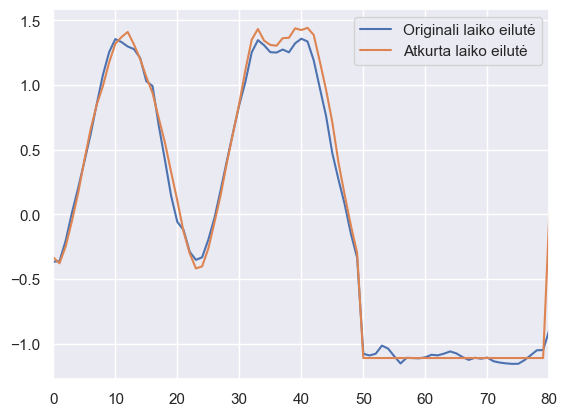

In [79]:
visOut = output.cpu()
visData = data.cpu()

seriesLen = int(torch.sum(mask[n]))

# visOutBest = outputBest.cpu()
minim_real = visData[n,:seriesLen].min().detach()
maxim_real = visData[n,:seriesLen].max().detach()

minim_ae = visOut[n,:seriesLen].min().detach()
maxim_ae = visOut[n,:seriesLen].max().detach()

minim = min(minim_ae, minim_real)
maxim = max(maxim_ae, maxim_real)


# visOut[1].detach().numpy()
# visData[1].detach().numpy()
plt.plot(visOut[n].detach().numpy())
# plt.plot(visOutBest[4].detach().numpy())
plt.plot(visData[n].detach().numpy())
plt.xlim([0, seriesLen])
plt.ylim([minim-abs(minim*0.1),maxim+abs(maxim*0.1)])
n += 1

plt.legend(["Originali laiko eilutė", "Atkurta laiko eilutė"])
# plt.plot(visOutBest[1].detach().numpy())

## Get features for classification

In [80]:
import torch.utils.data as data_utils

def classifLoader(df, inputLen: int, split: str, shuffle = True):
    dfSplit = df[df.dataset == split].reset_index()
    seriesLen = len(dfSplit.iloc[0]['scaledValues'])
    
    returnDf = pd.DataFrame()
    
    returnDf['paddedSeries'] = [(np.pad(line.scaledValues, (0, (inputLen-seriesLen))).tolist()) for index, line in dfSplit.iterrows()]

    returnDf['target'] = dfSplit.target
    
#     return returnDf
    # Creating np arrays
    target   = torch.tensor(returnDf['target'].values)
    features = pad_sequence([torch.tensor(list(x)) for x in returnDf.paddedSeries.values], batch_first = True)
#     return features
    
    dataset = TensorDataset(features, target)
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=shuffle)
    
    return loader

In [81]:
def latentData(loader, vae = False):
    model.cpu()
    dfLatent = pd.DataFrame()
    for series, target in loader:
        # Transfer to GPU
        if(train_on_gpu):
                pass
                #series = series.cuda()
        # Format batch size of 1
    #     series = series.view(1,-1)
        # Sample latent space from series
        if vae:
            mu, log_var = model.encoder(series)
            latentSample = model.reparametrize(mu, log_var)
        else:
            latentSample = model.encoder(series)
            
        sampleDf = pd.DataFrame(latentSample.detach().numpy())
        sampleDf['target'] = target
        dfLatent = dfLatent.append(sampleDf, ignore_index = True)
        
    return dfLatent    

In [82]:
def formResults(X_test, y_test, y_pred, score):
    results = pd.DataFrame(X_test).copy()
    results['class_truth'] = y_test
    results['class_pred']  = y_pred
    results['score']  = score
    results = results.reset_index(drop = True)
    
    return results

In [83]:
def getThreshold(model, X, y):
    # Find the best threshold based on train data
    
    y_proba = model.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(
    y, y_proba[:,1], drop_intermediate=False)
    
    best_thresh = thresholds[np.argmax(tpr - fpr)]
#     best_thresh = thresholds[np.argmin(np.abs(fpr+tpr-1))]
    return best_thresh

In [84]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, roc_curve
from sklearn import metrics
from sklearn.datasets import load_wine

from sklearn.ensemble import RandomForestClassifier

def testModel(df, dataset, latentSize = 16, useDefaultSplit = False):
    
    X = df.iloc[:,:latentSize]
    y = df.iloc[:,latentSize]

    if useDefaultSplit:
        dfTrain = df[df.setType == 'train']
        dfTest  = df[df.setType == 'test']

        X_train = dfTrain.iloc[:,:latentSize]
        y_train = dfTrain.iloc[:,latentSize]

        X_test = dfTest.iloc[:,:latentSize]
        y_test = dfTest.iloc[:,latentSize]
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        
    
    parameters = {"learning_rate"    : [0.01, 0.05, 0.10] ,
     "max_depth"        : [ 3, 4, 5, 6],
     "min_child_weight" : [ 1, 3, 5],
#      "gamma"            : [ 0.0, 0.1, 0.2 ],
#      "colsample_bytree" : [ 0.3, 0.4]
                 }
    
#     modelClass = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') 
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
#     modelClass = RandomForestClassifier(n_estimators=500)
    

    kfolds = model_selection.StratifiedKFold(3)
    modelClass = model_selection.GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=kfolds.split(X_train, y_train), 
                   scoring='roc_auc',
                   verbose=0, refit=True)
    
    modelClass.fit(X_train, y_train)
    
    threshold = getThreshold(modelClass, X_train, y_train)
#     threshold = 0.5
    
    y_pred = (modelClass.predict_proba(X_test)[:,1] >= threshold).astype(int)
#     y_pred = (modelClass.predict_proba(X_test)[:,1] >= 0.5).astype(int)
    
    dfResults = formResults(X_test, y_test, y_pred, modelClass.predict_proba(X_test)[:,1])
    
    confusion_matrix = pd.crosstab(dfResults.class_truth, dfResults.class_pred, rownames=['Actual'], colnames=['Predicted'])
    
    try:
        TN = confusion_matrix[0][0]
    except:
        TN = 0
        
    try:
        TP = confusion_matrix[1][1]
    except:
        TP = 0
        
    try:
        FN = confusion_matrix[0][1]
    except:
        FN = 0 
        
    try:
        FP = confusion_matrix[1][0]
    except:
        FP = 0
    
    precision = metrics.precision_score(y_test, y_pred, zero_division = 0)
    recall = metrics.recall_score(y_test, y_pred, zero_division = 0)
    fscore = metrics.f1_score(y_test, y_pred, zero_division = 0)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    row = {'dataset': dataset, 'accuracy': accuracy, 'TN': TN, 'TP': TP, 'FN': FN, 'FP': FP,
          'precision': precision, 'recall': recall, 'fscore': fscore, 'threshold': threshold}
    
    return dfResults, row

In [87]:
dfResults = pd.DataFrame()
dfAccuracy = pd.DataFrame(columns = ['dataset', 'threshold', 'accuracy', 'precision', 'recall', 'fscore', 'TN', 'TP', 'FN', 'FP'])
LatentFull = pd.DataFrame()

useDefaultSplit = True
vae = True
start_time = time.perf_counter()
for dataset in datasets_good:
    
    if useDefaultSplit:
        classLoader_train = classifLoader(myData[myData.setType == 'train'], inputLen, dataset)
        classLoader_test  = classifLoader(myData[myData.setType == 'test'], inputLen, dataset)
        
        dfLatent_train = latentData(classLoader_train, vae = vae)
        dfLatent_train['setType'] = 'train'
        dfLatent_test = latentData(classLoader_test, vae = vae)
        dfLatent_test['setType'] = 'test'
        
        dfLatent = dfLatent_train.append(dfLatent_test, ignore_index = True)
        
        dfDatasetResults, row = testModel(dfLatent, dataset, useDefaultSplit = True, latentSize = 4)
        
    else:
        classLoader = classifLoader(myData, inputLen, dataset)
        dfLatent = latentData(classLoader, vae = vae)
        dfDatasetResults, row = testModel(dfLatent, dataset, latentSize = 4)
    
    dfDatasetResults['dataset'] = dataset
    dfResults = dfResults.append(dfDatasetResults, ignore_index = True)
    
    dfAccuracy = dfAccuracy.append(row, ignore_index = True)
    
    dfLatent['dataset'] = dataset
    LatentFull = LatentFull.append(dfLatent, ignore_index = True)
    
    print("Finished:", dataset, row['accuracy'], row['threshold'])
    
end_time = time.perf_counter()

Finished: BeetleFly 0.65 0.49838525
Finished: BirdChicken 0.65 0.7301099
Finished: Chinatown 0.27405247813411077 1.5
Finished: Coffee 0.75 0.651699
Finished: Computers 0.468 0.46704274
Finished: DistalPhalanxOutlineCorrect 0.7210144927536232 0.72055715
Finished: DodgerLoopGame 0.7681159420289855 0.4996263
Finished: DodgerLoopWeekend 0.9855072463768116 0.7499148
Finished: ECG200 0.82 0.5671562
Finished: ECGFiveDays 0.7061556329849012 0.5483396
Finished: Earthquakes 0.60431654676259 0.2826547
Finished: FordA 0.6265151515151515 0.4896051
Finished: FordB 0.5481481481481482 0.45398203
Finished: FreezerRegularTrain 0.8154385964912281 0.5587173
Finished: FreezerSmallTrain 0.7235087719298245 0.7859322
Finished: GunPoint 0.7466666666666667 0.543202
Finished: GunPointAgeSpan 0.8734177215189873 0.376433
Finished: GunPointMaleVersusFemale 0.9335443037974683 0.7133778
Finished: GunPointOldVersusYoung 0.8952380952380953 0.48845723
Finished: Ham 0.5142857142857142 0.49084428
Finished: HandOutlines 0.

In [ ]:
print(f"Average speed: {round(len(myData) / (end_time - start_time), 2)} time-series per second")

In [88]:
dfAccuracy

,dataset,threshold,accuracy,precision,recall,fscore,TN,TP,FN,FP
0,BeetleFly,0.498385,0.650000,0.615385,0.800000,0.695652,5,8,2,5
1,BirdChicken,0.730110,0.650000,0.714286,0.500000,0.588235,8,5,5,2
2,Chinatown,1.500000,0.274052,0.000000,0.000000,0.000000,94,0,249,0
3,Coffee,0.651699,0.750000,0.687500,0.846154,0.758621,10,11,2,5
4,Computers,0.467043,0.468000,0.473684,0.576000,0.519856,45,72,53,80
5,DistalPhalanxOutlineCorrect,0.720557,0.721014,0.804348,0.689441,0.742475,88,111,50,27
6,DodgerLoopGame,0.499626,0.768116,0.729730,0.818182,0.771429,52,54,12,20
7,DodgerLoopWeekend,0.749915,0.985507,0.972222,0.972222,0.972222,101,35,1,1
8,ECG200,0.567156,0.820000,0.883333,0.828125,0.854839,29,53,11,7
9,ECGFiveDays,0.548340,0.706156,0.669173,0.822171,0.737824,252,356,77,176


### Evaluation using catch22 features

In [89]:
def c22Predict(dfData, dataset, featureList, useDefaultSplit = False):
    
    if useDefaultSplit:
        train = dfData[dfData.setType == 'train']
        test = dfData[dfData.setType == 'test']
        
        X_train = pd.DataFrame({'series': train.series}).reset_index(drop=True)
        y_train = train['target'].to_numpy()
        
        X_test = pd.DataFrame({'series': test.series}).reset_index(drop=True)
        y_test = test['target'].to_numpy()
        
#         print(f"train size: {len(train)}, test size: {len(test)}")
        
#         return X_test, y_test
        
    else:
        X = pd.DataFrame(dfData.series).reset_index(drop=True)
        y = dfData['target'].to_numpy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        
        return X_train, y_train
    
#     return X_train, X_test, y_train, y_test

    X_train, X_test = getC22Feats(X_train, y_train, X_test, y_test, featureList)
    
#     c22_uv = Catch22()
#     c22_uv.fit(X_train, y_train)
    
#     return X_train, X_test, y_train, y_test
    
#     X_train = c22_uv.transform(X_train)
#     X_test  = c22_uv.transform(X_test)
    
#     return X_train, X_test
    
#     return transformed_data_uv_train, transformed_data_uv_test

    parameters = {"learning_rate"    : [0.01, 0.05, 0.10] ,
     "max_depth"        : [ 3, 4, 5, 6],
     "min_child_weight" : [ 1, 3, 5],
#      "gamma"            : [ 0.0, 0.1, 0.2 ],
#      "colsample_bytree" : [ 0.3, 0.4]
                 }
    
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    #     modelClass = RandomForestClassifier(n_estimators=500)
    

    kfolds = model_selection.StratifiedKFold(3)
    modelClass = model_selection.GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=kfolds.split(X_train, y_train), 
                   scoring='roc_auc',
                   verbose=0, refit=True)
    
    modelClass.fit(X_train, y_train)
    
    threshold = getThreshold(modelClass, X_train, y_train)
#     threshold = 0.5
    
    y_pred = (modelClass.predict_proba(X_test)[:,1] >= threshold).astype(int)
#     y_pred = (modelClass.predict_proba(X_test)[:,1] >= 0.5).astype(int)
    
    dfResults = formResults(X_test, y_test, y_pred, modelClass.predict_proba(X_test)[:,1])
    
    confusion_matrix = pd.crosstab(dfResults.class_truth, dfResults.class_pred, rownames=['Actual'], colnames=['Predicted'])
    
    try:
        TN = confusion_matrix[0][0]
    except:
        TN = 0
        
    try:
        TP = confusion_matrix[1][1]
    except:
        TP = 0
        
    try:
        FN = confusion_matrix[0][1]
    except:
        FN = 0 
        
    try:
        FP = confusion_matrix[1][0]
    except:
        FP = 0
    
    precision = metrics.precision_score(y_test, y_pred, zero_division = 0)
    recall = metrics.recall_score(y_test, y_pred, zero_division = 0)
    fscore = metrics.f1_score(y_test, y_pred, zero_division = 0)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    row = {'dataset': dataset, 'accuracy': accuracy, 'TN': TN, 'TP': TP, 'FN': FN, 'FP': FP,
          'precision': precision, 'recall': recall, 'fscore': fscore, 'threshold': threshold}
    
    end_time = time.perf_counter ()
    
    return dfResults, row

In [90]:
def getC22Feats(X_train, y_train, X_test, y_test, featureList):
    c22_uv = Catch22()
    c22_uv.fit(X_train, y_train)
    
    trainFeatures = pd.DataFrame()
    testFeatures = pd.DataFrame()
    
    for feature in featureList:
        trainFeatures[feature] = c22_uv.transform_single_feature(X_train, feature)
        testFeatures[feature]  = c22_uv.transform_single_feature(X_test, feature)
        
    return trainFeatures, testFeatures

In [91]:
from sktime.transformations.panel.catch22 import Catch22

def c22Feats(dfData):
    # Function calculates catch22 features for each time series and the aggregates them
    X_train = pd.DataFrame(dfData['series']).reset_index(drop=True)
    y_train = dfData['target'].to_numpy()
    
    c22_uv = Catch22()
    c22_uv.fit(X_train, y_train)
    
    transformed_data_uv = c22_uv.transform(X_train)
    
    aggregateData = pd.DataFrame(data = [transformed_data_uv.mean()])
    # Deal with NAs
    aggregateData = aggregateData.fillna(0)
    
    return aggregateData

In [92]:
# c22Eval = pd.DataFrame()

# for dataset in datasets_good:
#     dfSplit = myData[myData.dataset == dataset]
#     dataC22 = c22Feats(dfSplit)
#     c22Dict = dataC22.loc[0].to_dict()
    
#     datasetAcc = float(dfAccuracy.accuracy[dfAccuracy.dataset == dataset])
    
#     predDict = {'dataset': dataset, 'accuracy': datasetAcc}
#     row = {**predDict, **c22Dict}
#     c22Eval = c22Eval.append(row, ignore_index = True)
    

# c22Eval = c22Eval.fillna(0)
# # Transforms
# c22Eval.iloc[:,2:] = np.log(c22Eval.iloc[:,2:]+1) # Log transform
# scaler = StandardScaler()
# c22Eval.iloc[:,2:] = pd.DataFrame(scaler.fit_transform(c22Eval.iloc[:,2:])) # Standardise
    

In [93]:
feature_names = [
'DN_HistogramMode_5',
'DN_HistogramMode_10',
'CO_f1ecac',
'CO_FirstMin_ac',
'CO_HistogramAMI_even_2_5',
'CO_trev_1_num',
'MD_hrv_classic_pnn40',
'SB_BinaryStats_mean_longstretch1',
'SB_TransitionMatrix_3ac_sumdiagcov',
'PD_PeriodicityWang_th0_01',
'CO_Embed2_Dist_tau_d_expfit_meandiff',
'IN_AutoMutualInfoStats_40_gaussian_fmmi',
'FC_LocalSimple_mean1_tauresrat',
'DN_OutlierInclude_p_001_mdrmd',
'DN_OutlierInclude_n_001_mdrmd',
'SP_Summaries_welch_rect_area_5_1',
'SB_BinaryStats_diff_longstretch0',
'SB_MotifThree_quantile_hh',
'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
'SP_Summaries_welch_rect_centroid',
'FC_LocalSimple_mean3_stderr'
]

In [94]:
# feature_names = ['DN_HistogramMode_5',
# 'DN_HistogramMode_10',
# 'SB_BinaryStats_diff_longstretch0',
# 'DN_OutlierInclude_p_001_mdrmd',
# 'DN_OutlierInclude_n_001_mdrmd',
# 'CO_f1ecac',
# 'CO_FirstMin_ac',
# 'SP_Summaries_welch_rect_area_5_1',
# 'SP_Summaries_welch_rect_centroid',
# 'FC_LocalSimple_mean3_stderr',
# 'CO_trev_1_num',
# 'CO_HistogramAMI_even_2_5',
# 'IN_AutoMutualInfoStats_40_gaussian_fmmi',
# 'MD_hrv_classic_pnn40',
# 'SB_BinaryStats_mean_longstretch1',
# 'SB_MotifThree_quantile_hh',
# 'FC_LocalSimple_mean1_tauresrat',
# 'CO_Embed2_Dist_tau_d_expfit_meandiff',
# 'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
# 'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
# 'SB_TransitionMatrix_3ac_sumdiagcov',
# 'PD_PeriodicityWang_th0_01']

In [95]:
dfResultsC22 = pd.DataFrame()
dfAccuracyC22 = pd.DataFrame(columns = ['dataset', 'threshold', 'accuracy', 'precision', 'recall', 'fscore', 'TN', 'TP', 'FN', 'FP'])

useDefaultSplit = True
vae = True

start_time = time.perf_counter()

for dataset in datasets_good:
    
    if useDefaultSplit:
        dfSplit = myData[myData.dataset == dataset]
#         X_train, X_test, y_train, y_test = c22Predict(dfSplit, dataset, useDefaultSplit = useDefaultSplit, featureList = feature_names)
        dfDatasetResults, row = c22Predict(dfSplit, dataset, useDefaultSplit = useDefaultSplit, featureList = feature_names)
    else:
        dfSplit = myData[myData.dataset == dataset]
        dfDatasetResults, row = c22Predict(dfSplit, dataset, useDefaultSplit = useDefaultSplit, featureList = feature_names)
    
    dfDatasetResults['dataset'] = dataset
    dfResultsC22 = dfResultsC22.append(dfDatasetResults, ignore_index = True)
    
    dfAccuracyC22 = dfAccuracyC22.append(row, ignore_index = True)
    
    print("Finished:", dataset, row['accuracy'], row['threshold'])
    
end_time = time.perf_counter()



Finished: BeetleFly 0.75 0.69648844
Finished: BirdChicken 0.7 0.6980918
Finished: Chinatown 0.6239067055393586 0.72624606
Finished: Coffee 0.9642857142857143 0.6411107
Finished: Computers 0.716 0.47840077
Finished: DistalPhalanxOutlineCorrect 0.8043478260869565 0.4895971
Finished: DodgerLoopGame 0.6304347826086957 0.48343164
Finished: DodgerLoopWeekend 0.9637681159420289 0.7499148
Finished: ECG200 0.77 0.6170005
Finished: ECGFiveDays 0.49709639953542395 1.437548
Finished: Earthquakes 0.7050359712230215 0.2730874
Finished: FordA 0.906060606060606 0.43578145
Finished: FordB 0.7716049382716049 0.55169916
Finished: FreezerRegularTrain 0.9971929824561403 0.8050566
Finished: FreezerSmallTrain 0.9975438596491228 0.7653577
Finished: GunPoint 0.9066666666666666 0.73032945
Finished: GunPointAgeSpan 0.9208860759493671 0.86453533
Finished: GunPointMaleVersusFemale 0.9746835443037974 0.60989916
Finished: GunPointOldVersusYoung 1.0 0.80444497
Finished: Ham 0.5904761904761905 0.57969713
Finished: Han

In [98]:
print(f"Average speed: {round(len(myData) / (end_time - start_time), 2)} time-series per second")

Average speed: 96.09 time-series per second


In [99]:
dfAccuracyC22

,dataset,threshold,accuracy,precision,recall,fscore,TN,TP,FN,FP
0,BeetleFly,0.696488,0.750000,1.000000,0.500000,0.666667,10,5,5,0
1,BirdChicken,0.698092,0.700000,0.833333,0.500000,0.625000,9,5,5,1
2,Chinatown,0.726246,0.623907,0.968750,0.497992,0.657825,90,124,125,4
3,Coffee,0.641111,0.964286,1.000000,0.923077,0.960000,15,12,1,0
4,Computers,0.478401,0.716000,0.732759,0.680000,0.705394,94,85,40,31
5,DistalPhalanxOutlineCorrect,0.489597,0.804348,0.802260,0.881988,0.840237,80,142,19,35
6,DodgerLoopGame,0.483432,0.630435,0.600000,0.681818,0.638298,42,45,21,30
7,DodgerLoopWeekend,0.749915,0.963768,0.969697,0.888889,0.927536,101,32,4,1
8,ECG200,0.617001,0.770000,0.836066,0.796875,0.816000,26,51,13,10
9,ECGFiveDays,1.437548,0.497096,0.000000,0.000000,0.000000,428,0,433,0


### Combined autoencoder and c22

In [ ]:
feature_names = ['DN_HistogramMode_5',
'DN_HistogramMode_10',
'SB_BinaryStats_diff_longstretch0',
'DN_OutlierInclude_p_001_mdrmd',
'DN_OutlierInclude_n_001_mdrmd',
'CO_f1ecac',
'CO_FirstMin_ac',
'SP_Summaries_welch_rect_area_5_1',
'SP_Summaries_welch_rect_centroid',
'FC_LocalSimple_mean3_stderr',
'CO_trev_1_num',
'CO_HistogramAMI_even_2_5',
'IN_AutoMutualInfoStats_40_gaussian_fmmi',
'MD_hrv_classic_pnn40',
'SB_BinaryStats_mean_longstretch1',
'SB_MotifThree_quantile_hh',
'FC_LocalSimple_mean1_tauresrat',
'CO_Embed2_Dist_tau_d_expfit_meandiff',
'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
'SB_TransitionMatrix_3ac_sumdiagcov',
'cPD_PeriodicityWang_th0_01']

In [ ]:
dropFeats = ['DN_HistogramMode_5',
'DN_HistogramMode_10',
'SB_BinaryStats_diff_longstretch0',
'DN_OutlierInclude_p_001_mdrmd',
'DN_OutlierInclude_n_001_mdrmd',
'CO_f1ecac',
'CO_FirstMin_ac',
'SP_Summaries_welch_rect_area_5_1',
'SP_Summaries_welch_rect_centroid',
'FC_LocalSimple_mean3_stderr']

In [ ]:
dropFeats = [

]

In [ ]:
len(reduced_feature_names)

In [ ]:
feature_names

In [ ]:
reduced_feature_names = list(set(feature_names) - set(dropFeats))

In [ ]:
dropFeats

In [ ]:
def combTest(dfData, dataset, featureList, useDefaultSplit = False, vae = True, latentSize = 16):
    
    
    X = pd.DataFrame(dfData.series).reset_index(drop=True)
    y = dfData['target'].to_numpy()
    
    
    if useDefaultSplit:
        trainData = dfData[dfData.setType == 'train']
        testData = dfData[dfData.setType == 'test']
        
        # Get latent data
        classLoader_train = classifLoader(trainData, inputLen, dataset)
        classLoader_test  = classifLoader(testData, inputLen, dataset)
        
        dfLatent_train = latentData(classLoader_train, vae = vae)
#         dfLatent_train['setType'] = 'train'
        dfLatent_test = latentData(classLoader_test, vae = vae)
#         dfLatent_test['setType'] = 'test'
        
#         dfLatent = dfLatent_train.append(dfLatent_test, ignore_index = True)
        
#         dfDatasetResults, row = testModel(dfLatent, dataset, useDefaultSplit = True, latentSize = 4)
        
        # Get c22 features
        
        X_train = pd.DataFrame(trainData.series).reset_index(drop=True)
        y_train = trainData['target'].to_numpy()
        
        X_test = pd.DataFrame(testData.series).reset_index(drop=True)
        y_test = testData['target'].to_numpy()
        
        c22_uv = Catch22()
        c22_uv.fit(X_train, y_train)
        
#         X_train, X_test = getC22Feats(X_train, y_train, X_test, y_test, featureList)
        
        X_train = c22_uv.transform(X_train)
        X_train.columns = feature_names
        X_train = X_train.drop(dropFeats, axis = 1)
        
        X_test  = c22_uv.transform(X_test)
        X_test.columns = feature_names
        X_test = X_test.drop(dropFeats, axis = 1)
        
        train = pd.concat([X_train, dfLatent_train], axis = 1)
        test = pd.concat([X_test, dfLatent_test], axis = 1)
        
        X_train = train.iloc[:, :-5]
        y_train = train.iloc[:, -1]
        
        X_test = test.iloc[:, :-5]
        y_test = test.iloc[:, -1]

        
    else:
        classLoader = classifLoader(dfData, inputLen, dataset)
        dfLatent = latentData(classLoader, vae = vae)
        dfDatasetResults, row = testModel(dfLatent, dataset, latentSize = 4)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    parameters = {"learning_rate"    : [0.01, 0.05, 0.10] ,
     "max_depth"        : [ 3, 4, 5, 6],
     "min_child_weight" : [ 1, 3, 5],
#      "gamma"            : [ 0.0, 0.1, 0.2 ],
#      "colsample_bytree" : [ 0.3, 0.4]
                 }
    
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    #     modelClass = RandomForestClassifier(n_estimators=500)
    

    kfolds = model_selection.StratifiedKFold(3)
    modelClass = model_selection.GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=kfolds.split(X_train, y_train), 
                   scoring='roc_auc',
                   verbose=0, refit=True)
    
    modelClass.fit(X_train, y_train)
    
    threshold = getThreshold(modelClass, X_train, y_train)
#     threshold = 0.5
    
    y_pred = (modelClass.predict_proba(X_test)[:,1] >= threshold).astype(int)
#     y_pred = (modelClass.predict_proba(X_test)[:,1] >= 0.5).astype(int)
    
    dfResults = formResults(X_test, y_test, y_pred, modelClass.predict_proba(X_test)[:,1])
    
    confusion_matrix = pd.crosstab(dfResults.class_truth, dfResults.class_pred, rownames=['Actual'], colnames=['Predicted'])
    
    try:
        TN = confusion_matrix[0][0]
    except:
        TN = 0
        
    try:
        TP = confusion_matrix[1][1]
    except:
        TP = 0
        
    try:
        FN = confusion_matrix[0][1]
    except:
        FN = 0 
        
    try:
        FP = confusion_matrix[1][0]
    except:
        FP = 0
    
    precision = metrics.precision_score(y_test, y_pred, zero_division = 0)
    recall = metrics.recall_score(y_test, y_pred, zero_division = 0)
    fscore = metrics.f1_score(y_test, y_pred, zero_division = 0)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    row = {'dataset': dataset, 'accuracy': accuracy, 'TN': TN, 'TP': TP, 'FN': FN, 'FP': FP,
          'precision': precision, 'recall': recall, 'fscore': fscore, 'threshold': threshold}
    
    return dfResults, row

In [ ]:
dfDatasetResults, row = combTest(myData[myData.dataset == 'FordA'], 'FordA', useDefaultSplit = True, latentSize = 4, featureList = reduced_feature_names)

In [ ]:
dfDatasetResults

In [ ]:
row

In [ ]:
dfResultsComb = pd.DataFrame()
dfAccuracyComb = pd.DataFrame(columns = ['dataset', 'threshold', 'accuracy', 'precision', 'recall', 'fscore', 'TN', 'TP', 'FN', 'FP'])

useDefaultSplit = True
vae = True

start_time = time.perf_counter()

for dataset in datasets_good:
    
    if useDefaultSplit:
        dfSplit = myData[myData.dataset == dataset]
        dfDatasetResults, row = combTest(dfSplit, dataset, useDefaultSplit = True, latentSize = 4, featureList = reduced_feature_names)
        
    else:
        dfSplit = myData[myData.dataset == dataset]
        dfDatasetResults, row = combTest(dfSplit, dataset, useDefaultSplit = False, latentSize = 4, featureList = reduced_feature_names)
    
    dfDatasetResults['dataset'] = dataset
    dfResultsComb = dfResultsComb.append(dfDatasetResults, ignore_index = True)
    
    dfAccuracyComb = dfAccuracyComb.append(row, ignore_index = True)
    
    print("Finished:", dataset, row['accuracy'], row['threshold'])
    
end_time = time.perf_counter()

In [ ]:
print(f"Average speed: {round(len(myData) / (end_time - start_time), 2)} time-series per second")

In [ ]:
df=pd.DataFrame({'xvalues': range(1,len(dfAccuracyComb)+1), 'yvalues': dfAccuracyComb.sort_values(by = 'accuracy', ascending=False).accuracy*100 })
 
# plot
plt.plot( 'xvalues', 'yvalues', data=df)
plt.xlabel("Duomenų rinkinio numeris")
plt.ylabel("Detekcijos tikslumas")
plt.ylim([45,102])

# show the graph
plt.show()

In [ ]:
dfAccuracyComb.to_excel("output.xlsx")  

In [ ]:
dfAccuracyComb

In [ ]:
dfAccuracyComb

### Catch22 comb naujas

In [100]:
feature_names = [
'DN_HistogramMode_5',
'DN_HistogramMode_10',
'CO_f1ecac',
'CO_FirstMin_ac',
'CO_HistogramAMI_even_2_5',
'CO_trev_1_num',
'MD_hrv_classic_pnn40',
'SB_BinaryStats_mean_longstretch1',
'SB_TransitionMatrix_3ac_sumdiagcov',
'PD_PeriodicityWang_th0_01',
'CO_Embed2_Dist_tau_d_expfit_meandiff',
'IN_AutoMutualInfoStats_40_gaussian_fmmi',
'FC_LocalSimple_mean1_tauresrat',
'DN_OutlierInclude_p_001_mdrmd',
'DN_OutlierInclude_n_001_mdrmd',
'SP_Summaries_welch_rect_area_5_1',
'SB_BinaryStats_diff_longstretch0',
'SB_MotifThree_quantile_hh',
'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
'SP_Summaries_welch_rect_centroid',
'FC_LocalSimple_mean3_stderr'
]

In [101]:
dropFeats = ['DN_HistogramMode_5',
'DN_HistogramMode_10',
'SB_BinaryStats_diff_longstretch0',
'DN_OutlierInclude_p_001_mdrmd',
'DN_OutlierInclude_n_001_mdrmd',
'CO_f1ecac',
'CO_FirstMin_ac',
'SP_Summaries_welch_rect_centroid',
'FC_LocalSimple_mean3_stderr']

In [102]:
reduced_feature_names = list(set(feature_names) - set(dropFeats))

In [103]:
reduced_feature_names

['SP_Summaries_welch_rect_area_5_1',
 'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
 'CO_trev_1_num',
 'SB_MotifThree_quantile_hh',
 'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
 'SB_TransitionMatrix_3ac_sumdiagcov',
 'IN_AutoMutualInfoStats_40_gaussian_fmmi',
 'CO_HistogramAMI_even_2_5',
 'FC_LocalSimple_mean1_tauresrat',
 'MD_hrv_classic_pnn40',
 'CO_Embed2_Dist_tau_d_expfit_meandiff',
 'PD_PeriodicityWang_th0_01',
 'SB_BinaryStats_mean_longstretch1']

In [104]:
def combTest(dfData, dataset, featureList, useDefaultSplit = False, vae = True, latentSize = 16):
    
    if useDefaultSplit:
        
        
        train = dfData[dfData.setType == 'train']
        test = dfData[dfData.setType == 'test']
        
        # Get latent data
        classLoader_train = classifLoader(train, inputLen, dataset, shuffle = False)
        classLoader_test  = classifLoader(test, inputLen, dataset, shuffle = False)
        
        dfLatent_train = latentData(classLoader_train, vae = vae)
#         dfLatent_train['setType'] = 'train'
        dfLatent_test = latentData(classLoader_test, vae = vae)
    
        dfLatent_train = dfLatent_train.drop(columns=['dataset'], errors='ignore', axis = 1)
        dfLatent_test  =  dfLatent_test.drop(columns=['dataset'], errors='ignore', axis = 1)
        
        X_train = pd.DataFrame({'series': train.series}).reset_index(drop=True)
        y_train = train['target'].to_numpy()
        
        X_test = pd.DataFrame({'series': test.series}).reset_index(drop=True)
        y_test = test['target'].to_numpy()
        
#         print(f"train size: {len(train)}, test size: {len(test)}")
        
#         return X_test, y_test
        
    else:
        X = pd.DataFrame(dfData.series).reset_index(drop=True)
        y = dfData['target'].to_numpy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        
        return X_train, y_train
    
#     return X_train, X_test, y_train, y_test

    X_train, X_test = getC22Feats(X_train, y_train, X_test, y_test, featureList)
    
    train = pd.concat([X_train, dfLatent_train], axis = 1)
    test = pd.concat([X_test, dfLatent_test], axis = 1)
    
    
    # Kažkas su views/copies, nesidropina paprastai
    tt = train.copy()
    tt.drop('dataset', axis = 1, errors='ignore', inplace = True)
    
    del X_train, y_train, X_test, y_test
    
#     X_train2 = tt.iloc[:, :-1]
    X_train = tt.loc[:, (tt.columns != 'target') & (tt.columns != 'dataset')] 
    y_train = tt.loc[:, (tt.columns == 'target')] 
    
    X_test = test.loc[:, (tt.columns != 'target') & (tt.columns != 'dataset')] 
    y_test = test.loc[:, (tt.columns == 'target')] 
    
#     c22_uv = Catch22()
#     c22_uv.fit(X_train, y_train)
    
#     return X_train, X_test, y_train, y_test
    
#     X_train = c22_uv.transform(X_train)
#     X_test  = c22_uv.transform(X_test)
    
#     return X_train, X_test
    
#     return transformed_data_uv_train, transformed_data_uv_test

    parameters = {"learning_rate"    : [0.01, 0.05, 0.10] ,
     "max_depth"        : [ 3, 4, 5, 6],
     "min_child_weight" : [ 1, 3, 5],
#      "gamma"            : [ 0.0, 0.1, 0.2 ],
#      "colsample_bytree" : [ 0.3, 0.4]
                 }
    
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    #     modelClass = RandomForestClassifier(n_estimators=500)
    

    kfolds = model_selection.StratifiedKFold(3)
    modelClass = model_selection.GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=kfolds.split(X_train, y_train), 
                   scoring='roc_auc',
                   verbose=0, refit=True)
    
    modelClass.fit(X_train, y_train)
    
    threshold = getThreshold(modelClass, X_train, y_train)
#     threshold = 0.5
    
    y_pred = (modelClass.predict_proba(X_test)[:,1] >= threshold).astype(int)
#     y_pred = (modelClass.predict_proba(X_test)[:,1] >= 0.5).astype(int)
    
    dfResults = formResults(X_test, y_test, y_pred, modelClass.predict_proba(X_test)[:,1])
    
    confusion_matrix = pd.crosstab(dfResults.class_truth, dfResults.class_pred, rownames=['Actual'], colnames=['Predicted'])
    
    try:
        TN = confusion_matrix[0][0]
    except:
        TN = 0
        
    try:
        TP = confusion_matrix[1][1]
    except:
        TP = 0
        
    try:
        FN = confusion_matrix[0][1]
    except:
        FN = 0 
        
    try:
        FP = confusion_matrix[1][0]
    except:
        FP = 0
    
    precision = metrics.precision_score(y_test, y_pred, zero_division = 0)
    recall = metrics.recall_score(y_test, y_pred, zero_division = 0)
    fscore = metrics.f1_score(y_test, y_pred, zero_division = 0)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    row = {'dataset': dataset, 'accuracy': accuracy, 'TN': TN, 'TP': TP, 'FN': FN, 'FP': FP,
          'precision': precision, 'recall': recall, 'fscore': fscore, 'threshold': threshold}
    
    end_time = time.perf_counter ()
    
    return dfResults, row

In [106]:
dfResultsComb = pd.DataFrame()
dfAccuracyComb = pd.DataFrame(columns = ['dataset', 'threshold', 'accuracy', 'precision', 'recall', 'fscore', 'TN', 'TP', 'FN', 'FP'])

useDefaultSplit = True
vae = True

start_time = time.perf_counter()

for dataset in datasets_good:
    
    if useDefaultSplit:
        dfSplit = myData[myData.dataset == dataset]
        dfDatasetResults, row = combTest(dfSplit, dataset, useDefaultSplit = True, latentSize = 4, featureList = reduced_feature_names, vae = vae)
        
    else:
        dfSplit = myData[myData.dataset == dataset]
        dfDatasetResults, row = combTest(dfSplit, dataset, useDefaultSplit = False, latentSize = 4, featureList = reduced_feature_names, vae = vae)
    
    dfDatasetResults['dataset'] = dataset
    dfResultsComb = dfResultsComb.append(dfDatasetResults, ignore_index = True)
    
    dfAccuracyComb = dfAccuracyComb.append(row, ignore_index = True)
    
    print("Finished:", dataset, row['accuracy'], row['threshold'])
    
end_time = time.perf_counter()

Finished: BeetleFly 0.8 0.6219196
Finished: BirdChicken 0.65 0.6136635
Finished: Chinatown 0.6180758017492711 0.5304402
Finished: Coffee 0.9642857142857143 0.6411107
Finished: Computers 0.712 0.5104469
Finished: DistalPhalanxOutlineCorrect 0.7753623188405797 0.4988073
Finished: DodgerLoopGame 0.6666666666666666 0.7098269
Finished: DodgerLoopWeekend 0.9202898550724637 0.7499148
Finished: ECG200 0.81 0.77509356
Finished: ECGFiveDays 0.6445993031358885 0.6937327
Finished: Earthquakes 0.7482014388489209 0.325736
Finished: FordA 0.8825757575757576 0.4565435
Finished: FordB 0.7481481481481481 0.5735077
Finished: FreezerRegularTrain 0.9971929824561403 0.8050566
Finished: FreezerSmallTrain 0.9975438596491228 0.7653577
Finished: GunPoint 0.9066666666666666 0.7203829
Finished: GunPointAgeSpan 0.9430379746835443 0.63709676
Finished: GunPointMaleVersusFemale 0.9493670886075949 0.83933383
Finished: GunPointOldVersusYoung 1.0 0.80444497
Finished: Ham 0.6571428571428571 0.5364232
Finished: HandOutlin

In [107]:
print(f"Average speed: {round(len(myData) / (end_time - start_time), 2)} time-series per second")

Average speed: 196.0 time-series per second


In [108]:
dfAccuracyComb

,dataset,threshold,accuracy,precision,recall,fscore,TN,TP,FN,FP
0,BeetleFly,0.621920,0.800000,1.000000,0.600000,0.750000,10,6,4,0
1,BirdChicken,0.613663,0.650000,0.800000,0.400000,0.533333,9,4,6,1
2,Chinatown,0.530440,0.618076,0.868750,0.558233,0.679707,73,139,110,21
3,Coffee,0.641111,0.964286,1.000000,0.923077,0.960000,15,12,1,0
4,Computers,0.510447,0.712000,0.719008,0.696000,0.707317,91,87,38,34
5,DistalPhalanxOutlineCorrect,0.498807,0.775362,0.779661,0.857143,0.816568,76,138,23,39
6,DodgerLoopGame,0.709827,0.666667,0.727273,0.484848,0.581818,60,32,34,12
7,DodgerLoopWeekend,0.749915,0.920290,0.765957,1.000000,0.867470,91,36,0,11
8,ECG200,0.775094,0.810000,0.941176,0.750000,0.834783,33,48,16,3
9,ECGFiveDays,0.693733,0.644599,0.850829,0.355658,0.501629,401,154,279,27


## t-SNE

In [109]:
LatentFull

,0,1,2,3,target,setType,dataset
0,1.695397,1.543552,-4.770974,-2.869569,1,train,BeetleFly
1,-1.241509,2.924838,3.087342,-0.224262,0,train,BeetleFly
2,-2.419188,-4.579165,3.936770,-5.740617,0,train,BeetleFly
3,-4.602242,3.416083,-1.028314,-3.336117,1,train,BeetleFly
4,0.214601,3.130613,-3.584415,-4.167956,1,train,BeetleFly
...,...,...,...,...,...,...,...
47733,1.368680,-4.821169,2.387200,-9.490855,1,test,Yoga
47734,0.953663,8.309239,-2.890971,1.959357,1,test,Yoga
47735,9.582367,-3.976317,-1.114904,-6.843980,1,test,Yoga
47736,7.067412,-7.794568,-0.059107,-4.426006,1,test,Yoga


In [120]:
projectdf = LatentFull[LatentFull.dataset == 'Wafer'].iloc[:,:17]

In [121]:
projectdf
x = projectdf.iloc[:,:4]
y = projectdf.iloc[:,4:]

In [122]:
from sklearn.manifold import TSNE
from matplotlib import cm

# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
tsne = TSNE(2, verbose=1)
tsne_proj_2D = tsne.fit_transform(x)

c:\users\aurelijus\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\aurelijus\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7164 samples in 0.006s...
[t-SNE] Computed neighbors for 7164 samples in 0.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7164
[t-SNE] Computed conditional probabilities for sample 2000 / 7164
[t-SNE] Computed conditional probabilities for sample 3000 / 7164
[t-SNE] Computed conditional probabilities for sample 4000 / 7164
[t-SNE] Computed conditional probabilities for sample 5000 / 7164
[t-SNE] Computed conditional probabilities for sample 6000 / 7164
[t-SNE] Computed conditional probabilities for sample 7000 / 7164
[t-SNE] Computed conditional probabilities for sample 7164 / 7164
[t-SNE] Mean sigma: 0.114272
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.936779
[t-SNE] KL divergence after 1000 iterations: 0.530384


<AxesSubplot:xlabel='x1', ylabel='x2'>

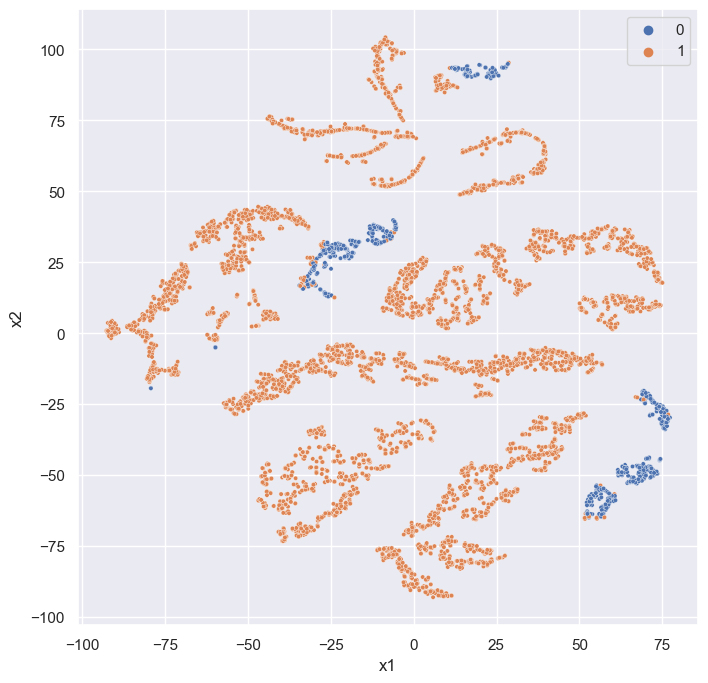

In [124]:
df = pd.DataFrame({'x1':tsne_proj_2D[:,0], 'x2':tsne_proj_2D[:,1], 'color': y.target})

sns.set(rc = {'figure.figsize':(8,8)})
sns.scatterplot(data=df, x = 'x1', y = 'x2', s = 10, hue=df.color.tolist())

In [125]:
dfLatent

,0,1,2,3,target,setType,dataset
0,9.189147,-2.020840,-2.306998,-4.213955,1,train,Yoga
1,-1.658055,-3.356599,2.458801,-9.045632,1,train,Yoga
2,4.011045,-2.203012,1.718124,-10.398618,1,train,Yoga
3,8.795725,6.441858,0.817811,-3.860050,0,train,Yoga
4,2.298475,6.680745,-3.439230,-3.649696,1,train,Yoga
...,...,...,...,...,...,...,...
3295,1.368680,-4.821169,2.387200,-9.490855,1,test,Yoga
3296,0.953663,8.309239,-2.890971,1.959357,1,test,Yoga
3297,9.582367,-3.976317,-1.114904,-6.843980,1,test,Yoga
3298,7.067412,-7.794568,-0.059107,-4.426006,1,test,Yoga


## Umap

In [126]:
import umap.umap_ as umap
mapper = umap.UMAP().fit(x)

<AxesSubplot:>

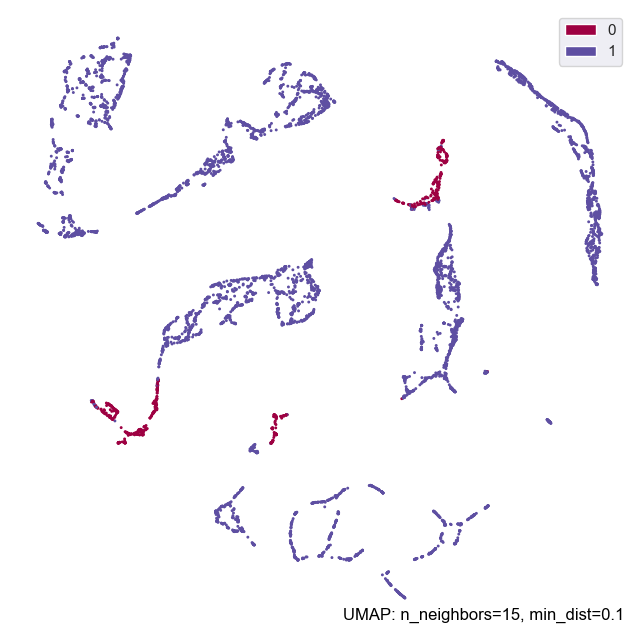

In [127]:
import umap.plot
umap.plot.points(mapper, labels=y.target)

## PCA

In [130]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 4 to 2 dimensions
projected = pca.fit_transform(x)
print(x.shape)
print(projected.shape)

(7164, 4)
(7164, 2)


In [131]:
projected

array([[-0.528428  ,  0.572685  ],
       [-1.5364542 , -0.7791438 ],
       [-2.1641393 , -0.08106806],
       ...,
       [-2.897981  ,  1.1694891 ],
       [-3.212471  ,  0.27555954],
       [ 5.7885427 ,  0.5157012 ]], dtype=float32)

Text(0, 0.5, '2-a komponentė')

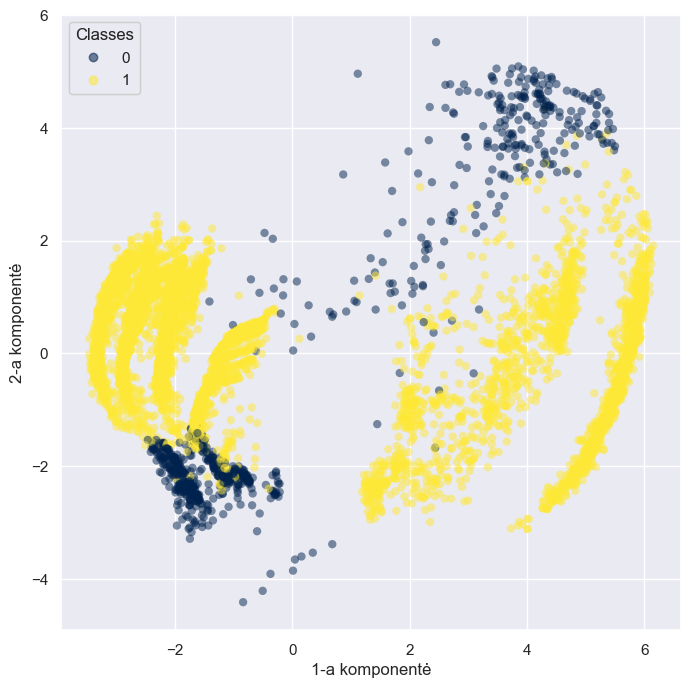

In [132]:
fig, ax = plt.subplots(figsize=(8,8))

scatter = ax.scatter(projected[:, 0], projected[:, 1],
            c=y.target, edgecolor='none', alpha=0.5, cmap='cividis')


#             cmap=plt.cm.get_cmap('Accent', 2)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")

ax.add_artist(legend1)

plt.xlabel('1-a komponentė')
plt.ylabel('2-a komponentė')



## Plots

In [133]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [134]:
count_parameters(model)

7910961

In [135]:
myData[myData.dataset == "Chinatown"]

,values,scaledValues,series,target,dataset,setType
80,"[573.0, 375.0, 301.0, 212.0, 55.0, 34.0, 25.0,...","[0.02593528851866722, -0.43565455079078674, -0...",0 573.0 1 375.0 2 301.0 3 ...,0,Chinatown,train
81,"[394.0, 264.0, 140.0, 144.0, 104.0, 28.0, 28.0...","[-0.43644610047340393, -0.7053996920585632, -0...",0 394.0 1 264.0 2 140.0 3 ...,0,Chinatown,train
82,"[603.0, 348.0, 176.0, 177.0, 47.0, 30.0, 40.0,...","[-0.050818875432014465, -0.5460601449012756, -...",0 603.0 1 348.0 2 176.0 3 ...,0,Chinatown,train
83,"[428.0, 309.0, 199.0, 117.0, 82.0, 43.0, 24.0,...","[-0.5937254428863525, -0.7829120755195618, -0....",0 428.0 1 309.0 2 199.0 3 ...,0,Chinatown,train
84,"[372.0, 310.0, 203.0, 133.0, 65.0, 39.0, 27.0,...","[-0.43369248509407043, -0.5930343270301819, -0...",0 372.0 1 310.0 2 203.0 3 ...,0,Chinatown,train
...,...,...,...,...,...,...
438,"[140.0, 57.0, 45.0, 32.0, 19.0, 23.0, 32.0, 89...","[-0.8875865340232849, -1.0724153518676758, -1....",0 140.0 1 57.0 2 45.0 3 ...,1,Chinatown,test
439,"[120.0, 57.0, 37.0, 28.0, 13.0, 14.0, 18.0, 80...","[-0.8658541440963745, -1.0200738906860352, -1....",0 120.0 1 57.0 2 37.0 3 ...,1,Chinatown,test
440,"[207.0, 147.0, 71.0, 57.0, 39.0, 29.0, 36.0, 8...","[-0.892386257648468, -0.9977948069572449, -1.1...",0 207.0 1 147.0 2 71.0 3 ...,1,Chinatown,test
441,"[293.0, 180.0, 73.0, 96.0, 85.0, 44.0, 86.0, 1...","[-0.8700932264328003, -1.0283981561660767, -1....",0 293.0 1 180.0 2 73.0 3 ...,1,Chinatown,test


In [141]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

def plotFrom9(df, title):    
    # Make a data frame
    # df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })

    # Initialize the figure style
    plt.style.use('seaborn-darkgrid')

    # set the figure size
    plt.figure(figsize=(10, 10))

    # create a color palette
    palette = plt.get_cmap('Set1')

    # multiple line plot
    num=0
    for column in df.drop('x', axis=1):
        num+=1

        # Find the right spot on the plot
        plt.subplot(3,3, num)

        # Plot the lineplot
        plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)

        # Same limits for every chart
        plt.xlim(0,25)
        plt.ylim(df.iloc[:, 1:].min().min(),df.iloc[:, 1:].max().max())

        # Not ticks everywhere
        if num in range(7) :
            plt.tick_params(labelbottom='off')
        if num not in [1,4,7] :
            plt.tick_params(labelleft='off')

        # Add title
#         plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

    # general title
#     plt.suptitle(title+" duomenų pavyzdys", fontsize=13, fontweight=0, color='black', style='italic')

    # Axis titles
#     plt.text(4, -50, 'Laikas', ha='center', va='center')
#     plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

    # Show the graph
    plt.savefig(title+".png")
    plt.show()

In [142]:
df1 = pd.DataFrame({'x' : list(range(1,25)),
                  'y1': myData.iloc[80,:]['values'],
                  'y2': myData.iloc[81,:]['values'],
                  'y3': myData.iloc[82,:]['values'],
                  'y4': myData.iloc[83,:]['values'],
                  'y5': myData.iloc[84,:]['values'],
                  'y6': myData.iloc[85,:]['values'],
                  'y7': myData.iloc[86,:]['values'],
                  'y8': myData.iloc[87,:]['values'],
                  'y9': myData.iloc[88,:]['values']})

In [143]:
df2 = pd.DataFrame({'x' : list(range(1,25)),
                  'y1': myData.iloc[80,:]['scaledValues'],
                  'y2': myData.iloc[81,:]['scaledValues'],
                  'y3': myData.iloc[82,:]['scaledValues'],
                  'y4': myData.iloc[83,:]['scaledValues'],
                  'y5': myData.iloc[84,:]['scaledValues'],
                  'y6': myData.iloc[85,:]['scaledValues'],
                  'y7': myData.iloc[86,:]['scaledValues'],
                  'y8': myData.iloc[87,:]['scaledValues'],
                  'y9': myData.iloc[88,:]['scaledValues']})

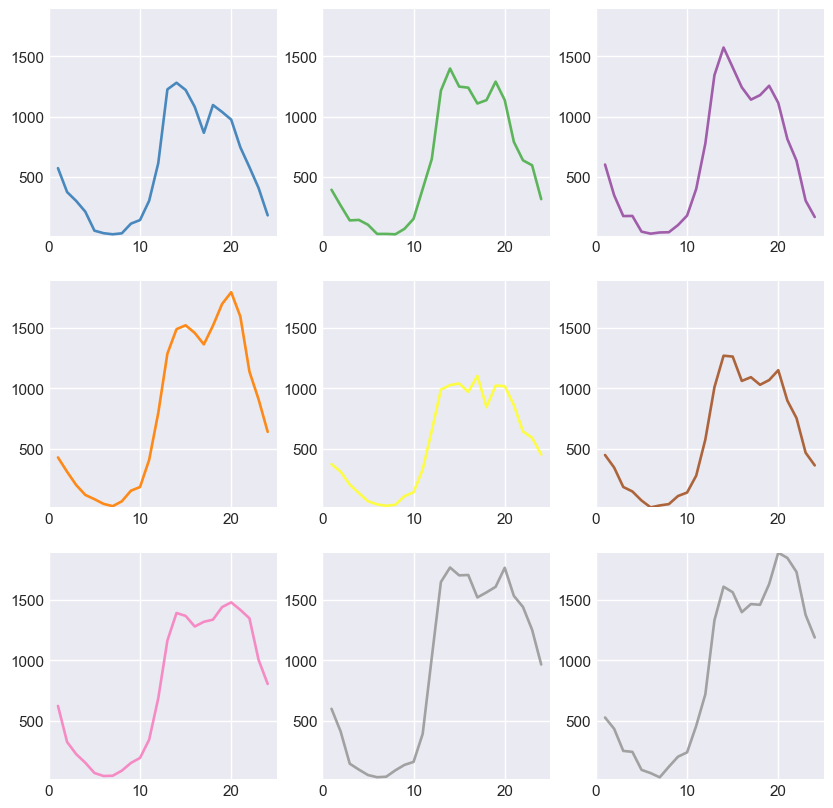

In [144]:
plotFrom9(df1, title = 'Netransformuotų')

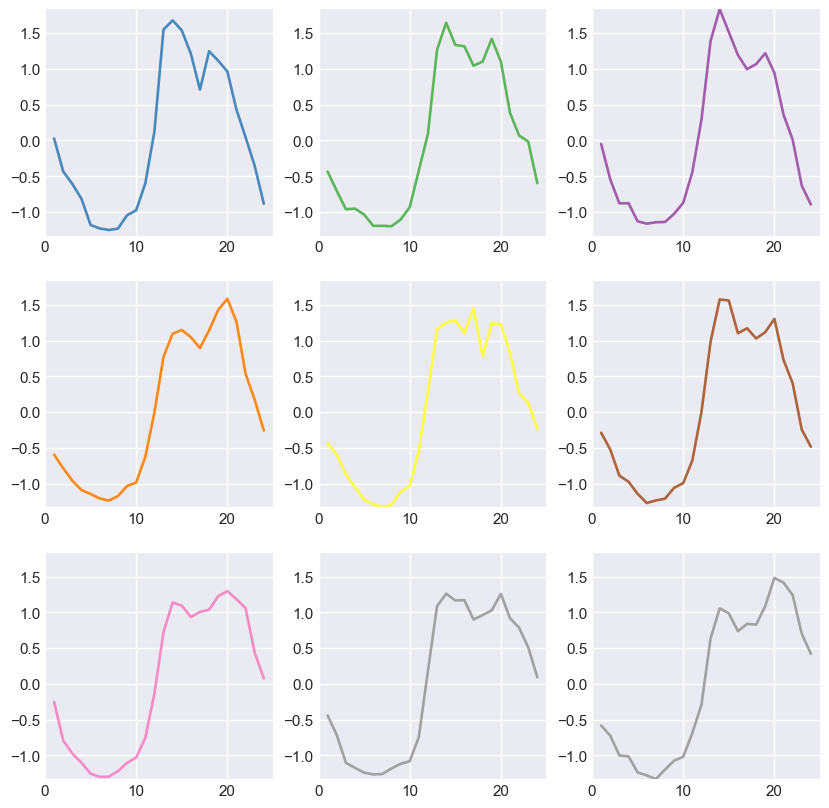

In [145]:
plotFrom9(df2, title = 'Transformuotų')

In [146]:
chartList = ['ShapeletSim', 'Chinatown',
             'GunPointOldVersusYoung', 'Wine',
             'FreezerSmallTrain', 'Ham',
             'FreezerRegularTrain', 'ECGFiveDays',
             'Wafer', 'Herring']

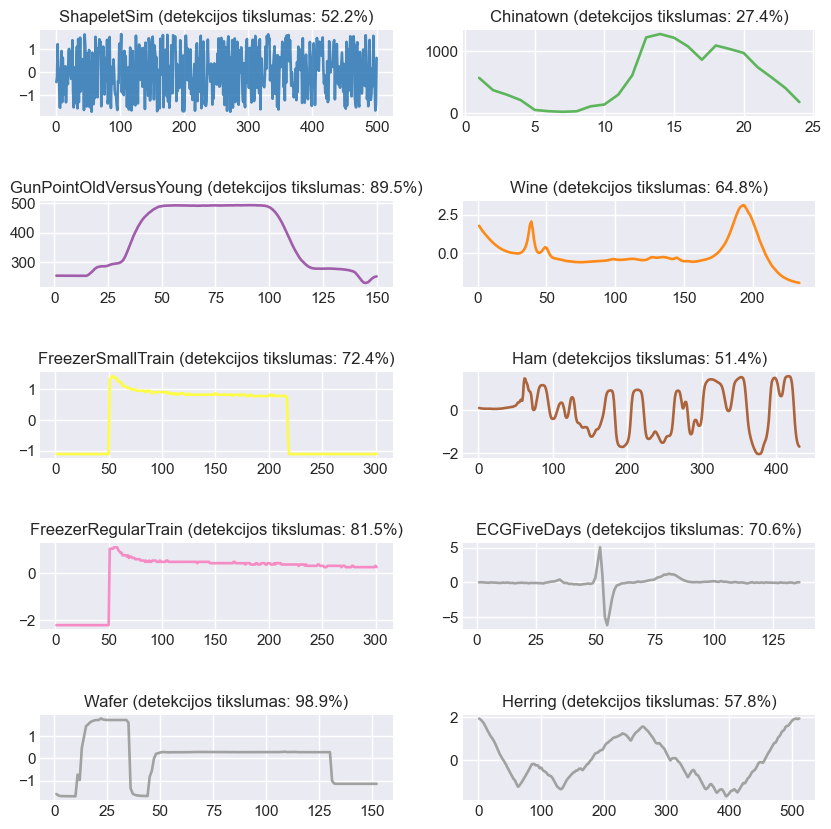

In [147]:
palette = plt.get_cmap('Set1')

 # Initialize the figure style
plt.style.use('seaborn-darkgrid')

    # set the figure size
plt.figure(figsize=(10, 10))

for num, chart in enumerate(chartList, start = 1):
    data = myData.loc[myData.dataset == chart, :]['values'].head(1).item()
    dataRange = list(range(1, len(data)+1))
    
    plt.subplot(5,2, num)
    plt.plot(dataRange, data, marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=chart)
    plt.title(f"{chart} (detekcijos tikslumas: {round(dfAccuracy[dfAccuracyComb.dataset == chart].accuracy.item() * 100, 1)}%)")
    
# # Same limits for every chart
# plt.xlim(0,25)
# plt.ylim(df.iloc[:, 1:].min().min(),df.iloc[:, 1:].max().max())
plt.subplots_adjust( hspace=1)
plt.show()

In [154]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

def plotFrom10(df, title):    
    # Make a data frame
    # df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })

    # Initialize the figure style
    plt.style.use('seaborn-darkgrid')

    # set the figure size
    plt.figure(figsize=(10, 10))

    # create a color palette
    palette = plt.get_cmap('Set1')

    # multiple line plot
    num=0
    for column in df.drop('x', axis=1):
        num+=1

        # Find the right spot on the plot
        plt.subplot(5,2, num)

        # Plot the lineplot
        plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)

        # Same limits for every chart
        plt.xlim(0,25)
        plt.ylim(df.iloc[:, 1:].min().min(),df.iloc[:, 1:].max().max())

        # Not ticks everywhere
        if num in range(7) :
            plt.tick_params(labelbottom='off')
        if num not in [1,4,7] :
            plt.tick_params(labelleft='off')

        # Add title
#         plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

    # general title
#     plt.suptitle(title+" duomenų pavyzdys", fontsize=13, fontweight=0, color='black', style='italic')

    # Axis titles
#     plt.text(4, -50, 'Laikas', ha='center', va='center')
#     plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

    # Show the graph
    plt.savefig(title+".png")
    plt.show()

In [ ]:
# ### test WITHOUT threshold selection

# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.datasets import load_wine

# from sklearn.ensemble import RandomForestClassifier

# def testModel(df, dataset, latentSize = 16):
#     X = dfLatent.iloc[:,:16]
#     y = dfLatent.iloc[:,16]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
# #     modelClass = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    
#     modelClass = RandomForestClassifier(n_estimators=100)
    
#     modelClass.fit(X_train, y_train)
    
#     threshold = getThreshold(modelClass, X_train, y_train)
    
#     y_pred = modelClass.predict(X_test)
    
#     dfResults = formResults(X_test, y_test, y_pred)
    
#     confusion_matrix = pd.crosstab(dfResults.class_truth, dfResults.class_pred, rownames=['Actual'], colnames=['Predicted'])
    
#     try:
#         TN = confusion_matrix[0][0]
#     except:
#         TN = 0
        
#     try:
#         TP = confusion_matrix[1][1]
#     except:
#         TP = 0
        
#     try:
#         FN = confusion_matrix[0][1]
#     except:
#         FN = 0 
        
#     try:
#         FP = confusion_matrix[1][0]
#     except:
#         FP = 0
    
#     precision = metrics.precision_score(y_test, y_pred)
#     recall = metrics.recall_score(y_test, y_pred)
#     fscore = metrics.f1_score(y_test, y_pred)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
    
#     row = {'dataset': dataset, 'accuracy': accuracy, 'TN': TN, 'TP': TP, 'FN': FN, 'FP': FP,
#           'precision': precision, 'recall': recall, 'fscore': fscore}
    
#     return dfResults, row

In [ ]:
# # ### TEST using in the source defined train/test split 

# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.datasets import load_wine

# def testModel(dfTrain, dfTest, latentSize = 16):
    
#     dfTrain = dfTrain.sample(frac=1)
#     dfTest  = dfTest.sample(frac=1)
    
#     X_train = dfTrain.iloc[:,:16]
#     y_train = dfTrain.iloc[:,16]
    
#     X_test = dfTest.iloc[:,:16]
#     y_test = dfTest.iloc[:,16]

# #     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#     modelClass = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
#     modelClass.fit(X_train, y_train)
#     y_pred = modelClass.predict(X_test)
    
#     accuracy = accuracy_score(y_test, y_pred)
    
#     dfResults = formResults(X_test, y_test, y_pred)
    
#     confusion_matrix = pd.crosstab(dfResults.class_truth, dfResults.class_pred, rownames=['Actual'], colnames=['Predicted'])
    
#     TN = confusion_matrix[0][0]
#     TP = confusion_matrix[1][1]
    
#     FN = confusion_matrix[0][1]
#     FP = confusion_matrix[1][0]
    
#     try:
#         precision = TP / (TP+FP)
#     except:
#         precision = 0
    
#     try:
#         recall = TP / (TP+FN)
#     except:
#         recall = 0
        
#     try:
#         fscore = 2 * (precision * recall) / (precision + recall)
#     except:
#         fscore = 0
    
#     return dfResults, accuracy, TN, TP, FN, FP, precision, recall, fscore

# dfResults = pd.DataFrame()
# dfAccuracy = pd.DataFrame(columns = ['dataset', 'accuracy', 'precision', 'recall', 'fscore', 'TN', 'TP', 'FN', 'FP'])

# for dataset in datasets_good:
#     classLoader_train = classifLoader(myData[myData.setType == 'train'], inputLen, dataset)
#     classLoader_test  = classifLoader(myData[myData.setType == 'test'], inputLen, dataset)
    
#     dfLatent_train = latentData(classLoader_train)
#     dfLatent_test = latentData(classLoader_test)
    
#     dfDatasetResults, accuracy, TN, TP, FN, FP, precision, recall, fscore = testModel(dfLatent_train, dfLatent_test)
    
#     dfDatasetResults['dataset'] = dataset
#     dfResults = dfResults.append(dfDatasetResults, ignore_index = True)
    
#     row = {'dataset': dataset, 'accuracy': accuracy, 'TN': TN, 'TP': TP, 'FN': FN, 'FP': FP,
#           'precision': precision, 'recall': recall, 'fscore': fscore}
#     dfAccuracy = dfAccuracy.append(row, ignore_index = True)
    
#     print("Finished:", dataset)